In [3]:
# prompt: mount drive and become a path as the working drectory and add to path system
import pandas as pd
from google.colab import drive
import sys
import os
import time
drive.mount('/content/drive')

path="/content/drive/My Drive/cod/RL_DS_dynamic"
os.chdir(path)
sys.path.append(path)


Mounted at /content/drive


In [4]:
!pip install --quiet stable-baselines3

In [5]:
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import ProgressBarCallback
from stable_baselines3.common.evaluation import evaluate_policy
from RL_DS.envs.retailer_gym import RetailerOrdersEnv, RetailerOrdersEnv2
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from RL_DS.utils.norm2 import MinMaxWrapper2
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import load_results, ts2xy
import pandas as pd

In [6]:
# Wrap your environment if needed (e.g., normalization)
log_dir = "./logs/sac_max_norm_log1"
monitor_path=log_dir+"/monitor.csv"
env = RetailerOrdersEnv2(time_horizon=47, track_data=True)
# Optionally: env = DummyVecEnv([lambda: env])
env_sc= MinMaxWrapper2(env )


env_sc = Monitor(env_sc, filename=log_dir, override_existing=False)
env_sc = DummyVecEnv([lambda: env_sc])  #

In [7]:
model = SAC.load("logs/best_model1")

# Set the environment for the loaded model
model.set_env(env_sc)

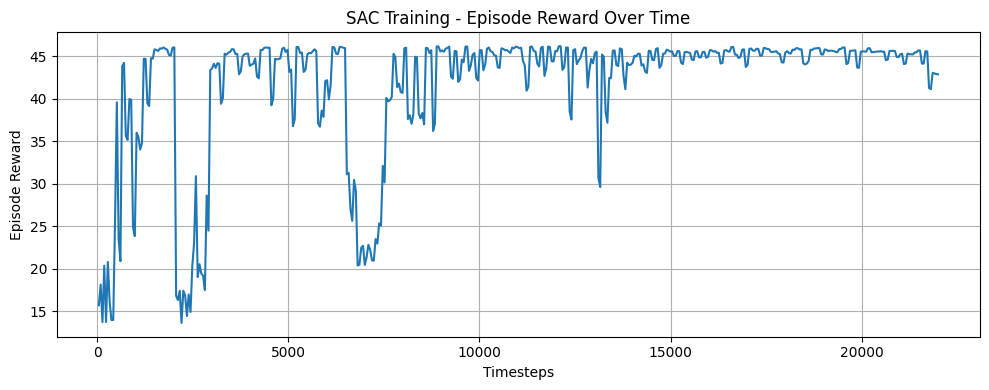

In [8]:

x, y = ts2xy(load_results(log_dir), 'timesteps')

plt.figure(figsize=(10, 4))
plt.plot(x, y)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward")
plt.title("SAC Training - Episode Reward Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:

test_env= RetailerOrdersEnv2(time_horizon=47, track_data=True)
test_env_sc=  MinMaxWrapper2(test_env )

obs, *_ = test_env_sc.reset()


for step in range(47):
    action, _states = model.predict(obs, deterministic=True)  # Use deterministic actions
    obs, reward, done, truncated, info = test_env_sc.step(action)
    if done:
        break
import pandas as pd
pd.DataFrame(test_env_sc.env.history)


,demand,action,backlog,capacity,change_in_capacity,shipment_to_retailer,desired_shipment,cumulative_demand,cumulative_shipment,order_cost,supply_gap_cost,step_cost,reward,cumulative_cost
0,100.0,159.200043,1000.000000,100.000000,0.000000,100.000000,100.000000,0.0,0.000000,25.344656,0.000000,25.344656,-25.344656,0.000000
1,100.0,160.447983,1000.000000,100.000000,0.000000,100.000000,100.000000,100.0,100.000000,25.743555,0.000000,25.743555,-25.743555,25.344656
2,100.0,161.414291,1000.000000,100.000000,0.000000,100.000000,100.000000,200.0,200.000000,26.054575,0.000000,26.054575,-26.054575,51.088211
3,120.0,155.205872,1000.000000,100.000000,0.000000,100.000000,100.000000,300.0,300.000000,24.088865,0.000000,24.088865,-24.088865,77.142784
4,120.0,156.133530,1059.200043,100.000000,1.973335,100.000000,105.920004,420.0,400.000000,24.377682,0.800000,25.177681,-25.177681,101.231651
5,120.0,153.455521,1119.648026,101.973335,3.330489,101.973335,111.964803,540.0,500.000000,23.548599,3.200000,26.748600,-26.748600,126.409332
6,120.0,148.975937,1179.088982,105.303824,4.201691,105.303824,117.908898,660.0,601.973335,22.193830,6.734188,28.928018,-28.928018,153.157928
7,120.0,143.260345,1228.991030,109.505515,4.464529,109.505515,122.899103,780.0,707.277159,20.523529,10.577223,31.100752,-31.100752,182.085953
8,120.0,137.495468,1275.619044,113.970045,4.530620,113.970045,127.561904,900.0,816.782674,18.905005,13.850247,32.755251,-32.755251,213.186707
9,120.0,129.399902,1315.104520,118.500665,4.336596,118.500665,131.510452,1020.0,930.752719,16.744335,15.930154,32.674490,-32.674490,245.941956


In [10]:
actions=pd.DataFrame(test_env_sc.env.history)['action']
#actions.to_csv('actions.csv', index=False)
reward=pd.DataFrame(test_env_sc.env.history).loc[35,'cumulative_cost']
print(f'reward: ',reward)

reward:  703.7048950195312


In [11]:
mean_reward, std_reward = evaluate_policy(model,test_env_sc, n_eval_episodes=1)  # Pass 'model' as a keyword argument
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")



Mean reward: 46.16 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
